### 뇌 MRI를 통한 알츠하이머 진행 정도 4단계 분류(고용량)
- https://www.kaggle.com/datasets/ninadaithal/imagesoasis

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/alzheimer/original/'

idg = ImageDataGenerator()
generator = idg.flow_from_directory(root, target_size=(64, 64), batch_size=20, class_mode='categorical')

print(generator.class_indices)
print(generator.classes)

Found 86437 images belonging to 4 classes.
{'Mild Dementia': 0, 'Moderate Dementia': 1, 'Non Demented': 2, 'Very mild Dementia': 3}
[0 0 0 ... 3 3 3]


In [8]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'Mild Dementia',
 1: 'Moderate Dementia',
 2: 'Non Demented',
 3: 'Very mild Dementia'}

In [9]:
target_names = []
test_target_names = []

for target in generator.classes:
    target_names.append(target_name[target])

print(target_names.__len__())

86437


In [10]:
import pandas as pd

original_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)

file_paths        target_names  \
0      ./datasets/alzheimer/original/Mild Dementia/OA...       Mild Dementia   
1      ./datasets/alzheimer/original/Mild Dementia/OA...       Mild Dementia   
2      ./datasets/alzheimer/original/Mild Dementia/OA...       Mild Dementia   
3      ./datasets/alzheimer/original/Mild Dementia/OA...       Mild Dementia   
4      ./datasets/alzheimer/original/Mild Dementia/OA...       Mild Dementia   
...                                                  ...                 ...   
86432  ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   
86433  ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   
86434  ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   
86435  ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   
86436  ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   

       targets  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
86432        3  
86433        3  
86434        3  
86435        3  
86436        3  

[86437 rows x 3 columns]

In [11]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, 
                 random_state=124)

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, 
                 random_state=124)

train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)
test_df = original_df.iloc[test_images.index].reset_index(drop=True)

display(train_df)
display(validation_df)
display(test_df)

file_paths        target_names  \
0      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
1      ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   
2      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
3      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
4      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
...                                                  ...                 ...   
55314  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
55315  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
55316  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
55317  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
55318  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   

       targets  
0            2  
1            3  
2            2  
3            2  
4            2  
...        ...  
55314        2  
55315        2  
55316        2  
55317        2  
55318        2  

[55319 rows x 3 columns]

file_paths        target_names  \
0      ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   
1      ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   
2      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
3      ./datasets/alzheimer/original/Mild Dementia/OA...       Mild Dementia   
4      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
...                                                  ...                 ...   
13825  ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   
13826  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
13827  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
13828  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
13829  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   

       targets  
0            3  
1            3  
2            2  
3            0  
4            2  
...        ...  
13825        3  
13826        2  
13827        2  
13828        2  
13829        2  

[13830 rows x 3 columns]

file_paths  target_names  \
0      ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   
1      ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   
2      ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   
3      ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   
4      ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   
...                                                  ...           ...   
17283  ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   
17284  ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   
17285  ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   
17286  ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   
17287  ./datasets/alzheimer/original/Non Demented/OAS...  Non Demented   

       targets  
0            2  
1            2  
2            2  
3            2  
4            2  
...        ...  
17283        2  
17284        2  
17285        2  
17286        2  
17287        2  

[17288 rows x 3 columns]

In [18]:
import shutil
import os.path

base_dir = './datasets/alzheimer/'


for filepath in train_images:
    destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [19]:
import shutil
import os.path

base_dir = './datasets/alzheimer/'


for filepath in validation_images:
    destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [20]:
import shutil
import os.path

base_dir = './datasets/alzheimer/'


for filepath in test_images:
    destination = base_dir + 'test/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [12]:
train_df = original_df.loc[train_images.index].reset_index(drop=True)
test_df = original_df.loc[test_images.index].reset_index(drop=True)
validation_df = original_df.loc[validation_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

55319
13830
17288


#### 1. inception

In [13]:
IMAGE_SIZE = 64
BATCH_SIZE = 64

train_generator = ImageDataGenerator()
validation_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle=True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 55319 validated image filenames belonging to 4 classes.
Found 13830 validated image filenames belonging to 4 classes.
Found 17288 validated image filenames belonging to 4 classes.
{'Mild Dementia': 0, 'Moderate Dementia': 1, 'Non Demented': 2, 'Very mild Dementia': 3}
{'Mild Dementia': 0, 'Moderate Dementia': 1, 'Non Demented': 2, 'Very mild Dementia': 3}
{'Mild Dementia': 0, 'Moderate Dementia': 1, 'Non Demented': 2, 'Very mild Dementia': 3}


In [14]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 64
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [15]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

# aug = A.Compose([
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
# ])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet': 
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(4, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 31, 31, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 31, 31, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 31, 31, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 29, 29, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 29, 29, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 29, 29, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 29, 29, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 29, 29, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 29, 29, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 15, 15, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 15, 15, 128)       │               

 Total params: 20,964,134 (79.97 MB)

 Trainable params: 20,909,606 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [38]:
import gc

gc.collect()

22046

In [39]:
N_EPOCHS = 20

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - acc: 0.7877 - loss: 0.5640

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


865/865 ━━━━━━━━━━━━━━━━━━━━ 694s 789ms/step - acc: 0.7878 - loss: 0.5638 - val_acc: 0.9437 - val_loss: 0.1670 - learning_rate: 0.0010
Epoch 2/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 2186s 3s/step - acc: 0.9426 - loss: 0.1706 - val_acc: 0.9132 - val_loss: 0.6222 - learning_rate: 0.0010
Epoch 3/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 624s 719ms/step - acc: 0.9789 - loss: 0.0658 - val_acc: 0.9743 - val_loss: 0.0710 - learning_rate: 0.0010
Epoch 4/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 605s 699ms/step - acc: 0.9908 - loss: 0.0341 - val_acc: 0.9361 - val_loss: 0.2417 - learning_rate: 0.0010
Epoch 5/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 613s 708ms/step - acc: 0.9918 - loss: 0.0282 - val_acc: 0.8928 - val_loss: 0.4954 - learning_rate: 0.0010
Epoch 6/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 18267s 21s/step - acc: 0.9971 - loss: 0.0133 - val_acc: 0.9991 - val_loss: 0.0027 - learning_rate: 1.0000e-04
Epoch 7/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 735s 847ms/step - acc: 0.9996 - loss: 0.0019 - val_acc: 0.9998 - val_loss: 8.5189e-04 - learn

In [40]:
model.evaluate(test_dataset)

271/271 ━━━━━━━━━━━━━━━━━━━━ 126s 464ms/step - acc: 0.9998 - loss: 4.9651e-04


[0.0007009903783909976, 0.9997107982635498]

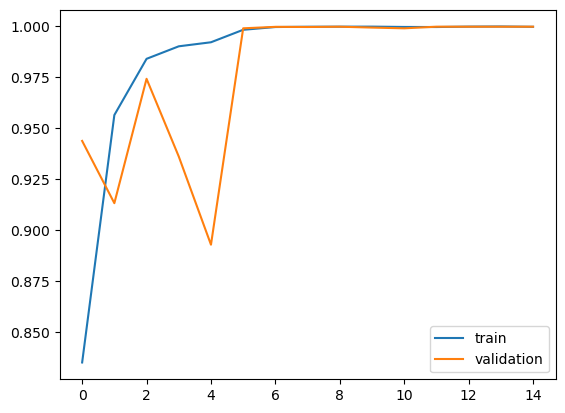

In [41]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

#### resnet50

In [42]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

# aug = A.Compose([
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
# ])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,454 (90.28 MB)

 Trainable params: 23,622,014 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [45]:
import gc

gc.collect()

5647

In [46]:
N_EPOCHS = 10

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


865/865 ━━━━━━━━━━━━━━━━━━━━ 309s 342ms/step - acc: 0.8000 - loss: 0.5285 - val_acc: 0.8480 - val_loss: 0.5783 - learning_rate: 0.0010
Epoch 2/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 290s 335ms/step - acc: 0.9502 - loss: 0.1544 - val_acc: 0.9497 - val_loss: 0.1838 - learning_rate: 0.0010
Epoch 3/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 284s 328ms/step - acc: 0.9788 - loss: 0.0712 - val_acc: 0.9736 - val_loss: 0.1080 - learning_rate: 0.0010
Epoch 4/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 295s 341ms/step - acc: 0.9867 - loss: 0.0464 - val_acc: 0.9937 - val_loss: 0.0190 - learning_rate: 0.0010
Epoch 5/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 285s 330ms/step - acc: 0.9878 - loss: 0.0440 - val_acc: 0.9836 - val_loss: 0.0497 - learning_rate: 0.0010
Epoch 6/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 286s 330ms/step - acc: 0.9909 - loss: 0.0303 - val_acc: 0.9371 - val_loss: 0.1990 - learning_rate: 0.0010
Epoch 7/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 291s 336ms/step - acc: 0.9917 - loss: 0.0299 - val_acc: 0.9994 - val_loss: 0.0020 - learning_ra

In [47]:
model.evaluate(test_dataset)

271/271 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - acc: 1.0000 - loss: 3.2131e-04


[0.000409488013247028, 0.999884307384491]

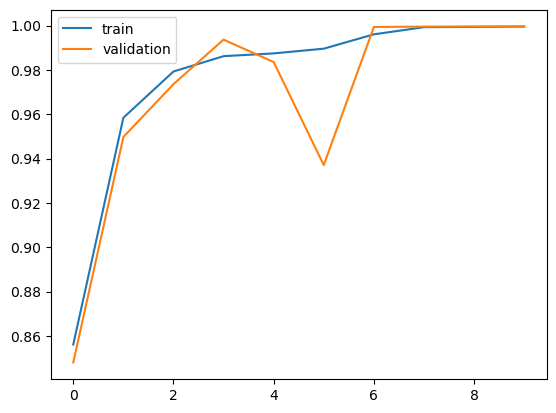

In [48]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

#### mobilenet

In [49]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

# aug = A.Compose([
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
# ])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [50]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_11240\3696762358.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,238 (8.86 MB)

 Trainable params: 2,288,126 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [52]:
import gc

gc.collect()

30005

In [53]:
N_EPOCHS = 10

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 143s 152ms/step - acc: 0.7878 - loss: 0.5580 - val_acc: 0.4756 - val_loss: 4.2172 - learning_rate: 0.0010
Epoch 2/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 136s 156ms/step - acc: 0.9394 - loss: 0.1786 - val_acc: 0.5109 - val_loss: 5.9624 - learning_rate: 0.0010
Epoch 3/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 134s 154ms/step - acc: 0.9704 - loss: 0.0930 - val_acc: 0.5591 - val_loss: 8.3281 - learning_rate: 0.0010
Epoch 4/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 133s 153ms/step - acc: 0.9927 - loss: 0.0250 - val_acc: 0.9579 - val_loss: 0.2601 - learning_rate: 1.0000e-04
Epoch 5/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 132s 152ms/step - acc: 0.9983 - loss: 0.0066 - val_acc: 0.9941 - val_loss: 0.0186 - learning_rate: 1.0000e-04
Epoch 6/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 132s 152ms/step - acc: 0.9989 - loss: 0.0043 - val_acc: 0.9983 - val_loss: 0.0054 - learning_rate: 1.0000e-04
Epoch 7/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 131s 151ms/step - acc: 0.9989 - loss: 0.0045 - val_acc: 0.9957 - val_los

In [54]:
model.evaluate(test_dataset)

271/271 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - acc: 0.9999 - loss: 3.8213e-04


[0.0004423295031301677, 0.999884307384491]

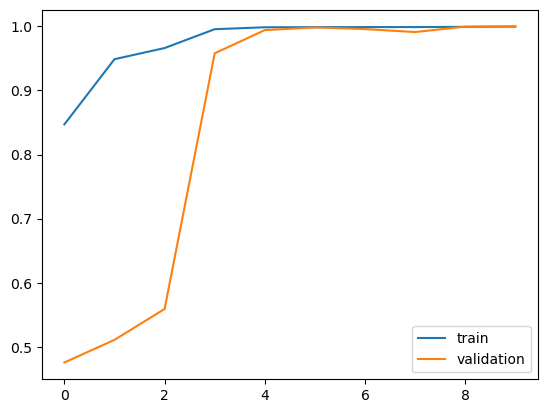

In [55]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

#### vgg16

In [56]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

# aug = A.Compose([
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
# ])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

In [57]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = create_model(model_name='vgg16', verbose=True)
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,740,542 (56.23 MB)

 Trainable params: 14,740,542 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [59]:
import gc

gc.collect()

50421

In [60]:
N_EPOCHS = 10

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 525s 604ms/step - acc: 0.7508 - loss: 1.6506 - val_acc: 0.7777 - val_loss: 0.6655 - learning_rate: 0.0010
Epoch 2/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 518s 599ms/step - acc: 0.7785 - loss: 0.6431 - val_acc: 0.8051 - val_loss: 0.4756 - learning_rate: 0.0010
Epoch 3/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 527s 609ms/step - acc: 0.7952 - loss: 0.5211 - val_acc: 0.7993 - val_loss: 0.5538 - learning_rate: 0.0010
Epoch 4/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 522s 603ms/step - acc: 0.8051 - loss: 0.4817 - val_acc: 0.8568 - val_loss: 0.3459 - learning_rate: 0.0010
Epoch 5/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 536s 620ms/step - acc: 0.8793 - loss: 0.3061 - val_acc: 0.9450 - val_loss: 0.1529 - learning_rate: 0.0010
Epoch 6/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 523s 605ms/step - acc: 0.9508 - loss: 0.1400 - val_acc: 0.9757 - val_loss: 0.0682 - learning_rate: 0.0010
Epoch 7/10
865/865 ━━━━━━━━━━━━━━━━━━━━ 517s 597ms/step - acc: 0.9771 - loss: 0.0663 - val_acc: 0.9810 - val_loss: 0.0530 - 

In [61]:
model.evaluate(test_dataset)

271/271 ━━━━━━━━━━━━━━━━━━━━ 49s 181ms/step - acc: 0.9906 - loss: 0.0349


[0.032513707876205444, 0.9908028841018677]

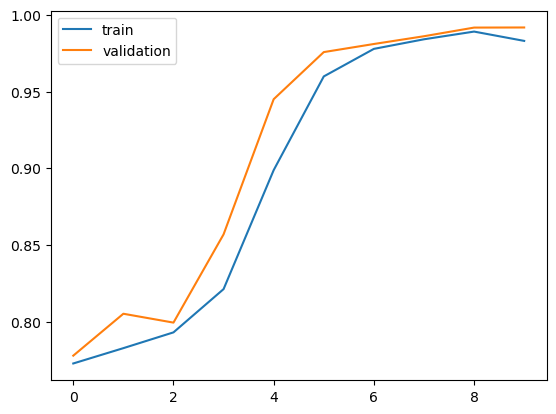

In [62]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

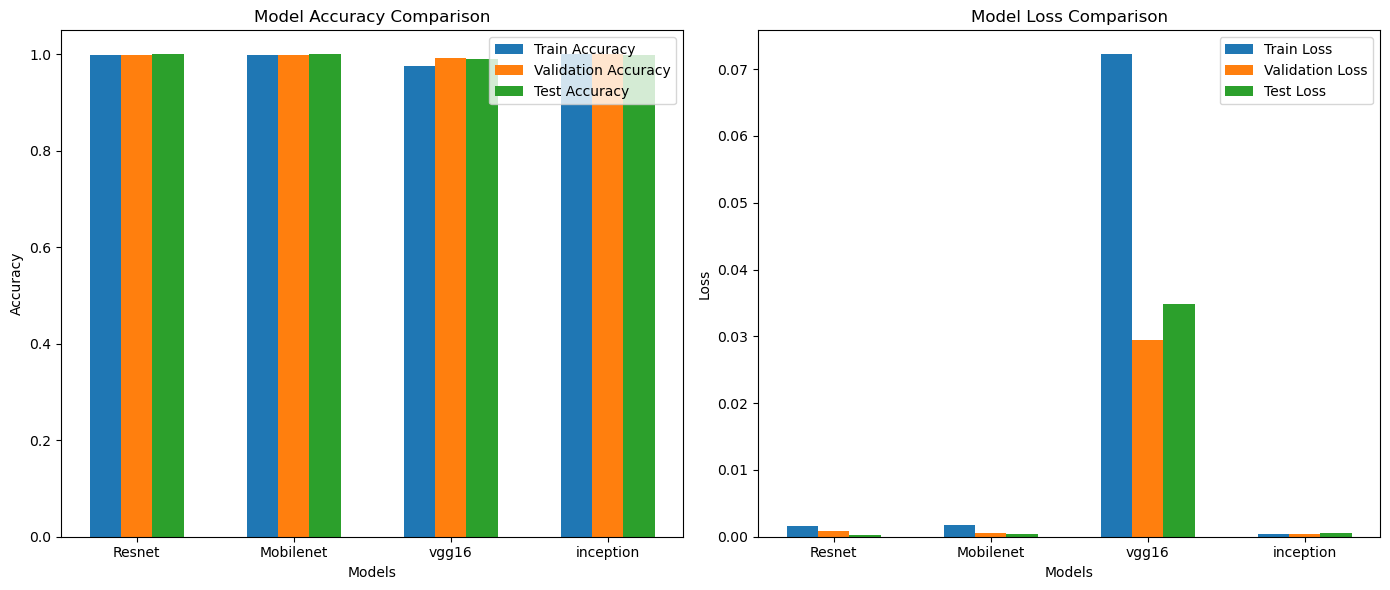

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 이름
models = ['Resnet', 'Mobilenet', 'vgg16', 'inception']

# 각 모델의 정확도 및 손실
accuracy = {
    'train': [0.9997, 0.9996, 0.9761, 0.9999],
    'validation': [0.9996, 0.9998, 0.9918, 0.9999],
    'test': [1.0000, 0.9999, 0.9906, 0.9998]
}

loss = {
    'train': [0.0016, 0.0018, 0.0722, 4.4277e-04],
    'validation': [8.0787e-04, 6.0580e-04, 0.0295, 4.6054e-04],
    'test': [3.2131e-04, 3.8213e-04, 0.0349, 4.9651e-04]
}

# x축의 위치
x = np.arange(len(models))

# 막대 너비
bar_width = 0.2

# 정확도 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 정확도 그래프
ax[0].bar(x - bar_width, accuracy['train'], width=bar_width, label='Train Accuracy')
ax[0].bar(x, accuracy['validation'], width=bar_width, label='Validation Accuracy')
ax[0].bar(x + bar_width, accuracy['test'], width=bar_width, label='Test Accuracy')

# 설정
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()

# 손실 시각화
# 손실 그래프
ax[1].bar(x - bar_width, loss['train'], width=bar_width, label='Train Loss')
ax[1].bar(x, loss['validation'], width=bar_width, label='Validation Loss')
ax[1].bar(x + bar_width, loss['test'], width=bar_width, label='Test Loss')

# 설정
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model Loss Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [92]:
def preprocess_image(image_path):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    resized_image = np.expand_dims(resized_image, axis=0)
    resized_image = resized_image / 255.0 
    resized_image = vgg16_preprocess_input(resized_image)
    return resized_image

# 이미지 전처리 및 예측
image_path = './datasets/normal.png'
preprocessed_image = preprocess_image(image_path)

# 예측 수행
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction, axis=1)[0]

# 클래스 이름 설정
class_names = ['경증', '초기', '정상', '중증']

# 결과 출력
print(class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
정상


In [93]:
def preprocess_image(image_path):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    resized_image = np.expand_dims(resized_image, axis=0)
    resized_image = resized_image / 255.0  # 스케일링
    resized_image = vgg16_preprocess_input(resized_image)
    return resized_image

# 이미지 전처리 및 예측
image_path = './datasets/alz_test.png'
preprocessed_image = preprocess_image(image_path)

# 예측 수행
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction, axis=1)[0]

# 클래스 이름 설정
class_names = ['경증', '초기', '정상', '중증']

# 결과 출력
print(class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
정상


### 📍사전 훈련 모델 4가지 + 동일한 분류기를 적용하여 학습한 결과
- 정확도와 손실도를 보았을때, 정확도는 점점 증가하는 추세이며 0.99에 가깝고 손실도는 점점 낮아지는 추세이다.
- 이것으로 보아 모델의 성능 자체는 준수한 것으로 판단하고, 실제 이미지를 넣어 예측해보았으나, 정상만을 예측하는 결과를 볼 수 있었다.  
- 정상/초기/중증/경증 4가지의 카테고별로 데이터 수가 달라서라고 판단하였고  
  이를 해소하기 위해 데이터 수가 많은 정상/경증은 언더샘플링을 진행하고 데이터 수가 적은 초기는 오버샘플링을 진행해보고자 한다.

In [17]:
train_df

file_paths        target_names  \
0      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
1      ./datasets/alzheimer/original/Very mild Dement...  Very mild Dementia   
2      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
3      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
4      ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
...                                                  ...                 ...   
55314  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
55315  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
55316  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
55317  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   
55318  ./datasets/alzheimer/original/Non Demented/OAS...        Non Demented   

       targets  
0            2  
1            3  
2            2  
3            2  
4            2  
...        ...  
55314        2  
55315        2  
55316        2  
55317        2  
55318        2  

[55319 rows x 3 columns]

In [18]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 특성과 레이블을 분리합니다.
X = train_df.drop('target_names', axis=1)
y = train_df['target_names']

# 현재 클래스 분포를 확인합니다.
print("Original class distribution:")
print(Counter(y))

# 언더샘플링: non demented와 very mild를 각각 3000개로 줄입니다.
under_sampler = RandomUnderSampler(sampling_strategy={'Non Demented': 3000, 'Very mild Dementia': 3000})
X_res, y_res = under_sampler.fit_resample(X, y)

# 오버샘플링: moderate 클래스를 3000개로 증가시킵니다.
over_sampler = RandomOverSampler(sampling_strategy={'Moderate Dementia': 3000})
X_res, y_res = over_sampler.fit_resample(X_res, y_res)

# 최종 클래스 분포를 확인합니다.
print("Resampled class distribution:")
print(Counter(y_res))

# 데이터프레임으로 다시 결합합니다.
resampled_data = pd.concat([X_res, y_res], axis=1)

# 필요한 경우, 데이터를 저장합니다.
# resampled_data.to_csv('resampled_data.csv', index=False)

Original class distribution:
Counter({'Non Demented': 43021, 'Very mild Dementia': 8784, 'Mild Dementia': 3202, 'Moderate Dementia': 312})
Resampled class distribution:
Counter({'Mild Dementia': 3202, 'Moderate Dementia': 3000, 'Non Demented': 3000, 'Very mild Dementia': 3000})


In [19]:
resampled_data

file_paths  targets  \
0      ./datasets/alzheimer/original/Mild Dementia/OA...        0   
1      ./datasets/alzheimer/original/Mild Dementia/OA...        0   
2      ./datasets/alzheimer/original/Mild Dementia/OA...        0   
3      ./datasets/alzheimer/original/Mild Dementia/OA...        0   
4      ./datasets/alzheimer/original/Mild Dementia/OA...        0   
...                                                  ...      ...   
12197  ./datasets/alzheimer/original/Moderate Dementi...        1   
12198  ./datasets/alzheimer/original/Moderate Dementi...        1   
12199  ./datasets/alzheimer/original/Moderate Dementi...        1   
12200  ./datasets/alzheimer/original/Moderate Dementi...        1   
12201  ./datasets/alzheimer/original/Moderate Dementi...        1   

            target_names  
0          Mild Dementia  
1          Mild Dementia  
2          Mild Dementia  
3          Mild Dementia  
4          Mild Dementia  
...                  ...  
12197  Moderate Dementia  
12198  Moderate Dementia  
12199  Moderate Dementia  
12200  Moderate Dementia  
12201  Moderate Dementia  

[12202 rows x 3 columns]

#### 1. vgg16

In [112]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = resampled_data['file_paths'].values
train_targets = resampled_data['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

In [113]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = create_model(model_name='vgg16', verbose=True)
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,740,542 (56.23 MB)

 Trainable params: 14,740,542 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [115]:
import gc

gc.collect()

12098

In [117]:
from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치를 계산합니다.
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_targets), y=train_targets)
class_weights = dict(enumerate(class_weights))

N_EPOCHS = 10

# 모델 학습 시 클래스 가중치를 적용합니다.
history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    class_weight=class_weights,  # 클래스 가중치를 추가합니다.
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - acc: 0.2552 - loss: 5.4968 - val_acc: 0.0280 - val_loss: 1.4337 - learning_rate: 0.0010
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - acc: 0.3332 - loss: 1.3297 - val_acc: 0.2633 - val_loss: 1.2764 - learning_rate: 0.0010
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - acc: 0.5230 - loss: 0.9463 - val_acc: 0.4490 - val_loss: 1.0532 - learning_rate: 0.0010
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - acc: 0.6057 - loss: 0.7888 - val_acc: 0.6276 - val_loss: 0.8242 - learning_rate: 0.0010
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - acc: 0.6760 - loss: 0.6842 - val_acc: 0.6993 - val_loss: 0.6659 - learning_rate: 0.0010
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - acc: 0.7459 - loss: 0.5888 - val_acc: 0.7242 - val_loss: 0.5677 - learning_rate: 0.0010
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - acc: 0.8271 - loss: 0.4162 - val_acc: 0.7889 - val_loss: 0.4674 - learning_rate: 0.0010
Epoch 8/10

In [118]:
model.evaluate(test_dataset)

271/271 ━━━━━━━━━━━━━━━━━━━━ 81s 300ms/step - acc: 0.8168 - loss: 0.4690


[0.47560107707977295, 0.8164044618606567]

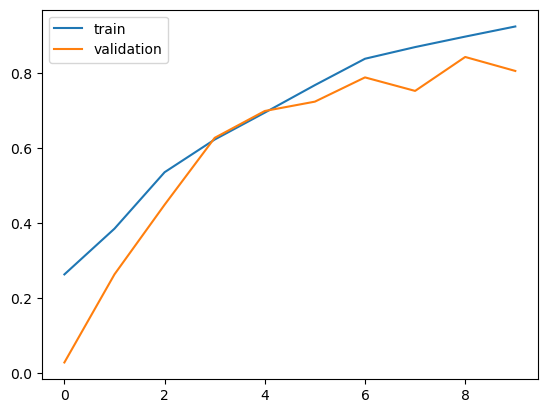

In [119]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


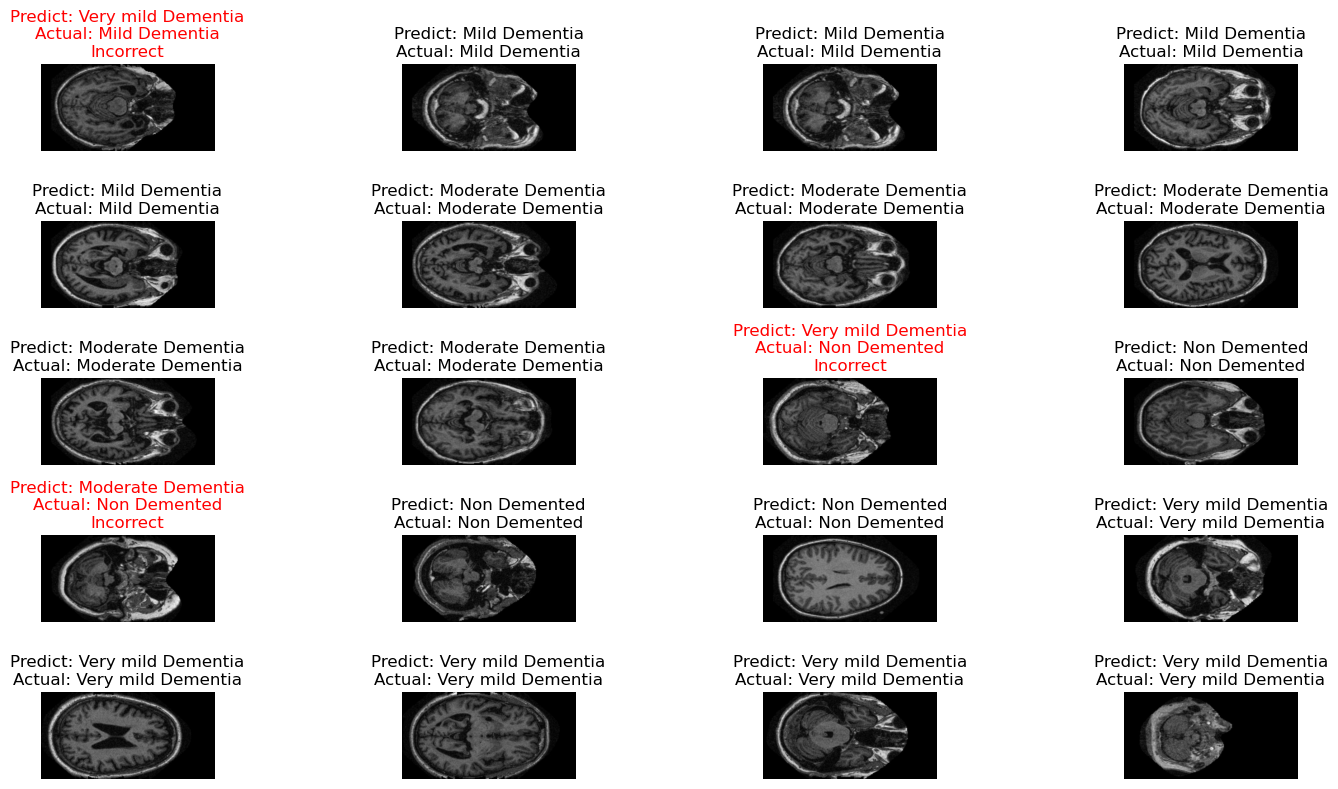

In [144]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# 이미지 로드 및 전처리
IMAGE_DIR = './datasets/alzheimer/original/'
IMAGE_SIZE = 64
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

def load_random_images(image_dir, class_names, num_images=16):
    images_per_class = num_images // len(class_names)
    remainder = num_images % len(class_names)

    images = []
    labels = []

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
        selected_images = random.sample(all_images, min(images_per_class, len(all_images)))

        images.extend(selected_images)
        labels.extend([class_name] * len(selected_images))

    # 추가로 필요한 이미지를 무작위로 선택
    if remainder > 0:
        additional_images = []
        additional_labels = []
        for class_name in class_names:
            class_dir = os.path.join(image_dir, class_name)
            all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
            additional_images.extend(random.sample(all_images, min(remainder, len(all_images))))
            additional_labels.extend([class_name] * min(remainder, len(all_images)))
            remainder -= len(additional_images)
            if remainder <= 0:
                break
        images.extend(additional_images)
        labels.extend(additional_labels)

    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 20개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=20)

# Predict and visualize the results
plt.figure(figsize=(15, 8))  
for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=8)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    # Visualize the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(5, 4, idx + 1)  # Visualize the images in a 4x4 grid
    plt.imshow(image)
    actual_class_name = random_labels[idx]
    title_text = f"Predict: {predicted_class_name}\nActual: {actual_class_name}"
    if predicted_class_name != actual_class_name:
        title_text += "\nIncorrect"
        plt.title(title_text, color='red')  # 틀린 예측은 빨간색으로 표시
    else:
        plt.title(title_text)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 📍데이터의 비중을 맞춘 뒤 훈련한 결과
-  카테고리별로 3000개 정도로 맞춘 뒤, 많이 삭제 된 만큼 데이터 증강을 통해 이미지 수를 늘렸다.
-  이후, 학습을 진행하였더니 정확도는 0.81정도로 데이터 삭제 전(0.99)보다는 낮아진 수치를 보였지만, 대체로 정확한 예측을 한다는 것을 확인하였다.
-  다른 사전 훈련 모델들도 이용하여 훈련을 진행해보고자 한다.

#### 2. Resnet

In [146]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = resampled_data['file_paths'].values
train_targets = resampled_data['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet50_preprocess_input)

In [147]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,454 (90.28 MB)

 Trainable params: 23,622,014 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [148]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [149]:
import gc

gc.collect()

40080

In [150]:
from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치를 계산합니다.
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_targets), y=train_targets)
class_weights = dict(enumerate(class_weights))

N_EPOCHS = 10

# 모델 학습 시 클래스 가중치를 적용합니다.
history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    class_weight=class_weights,  # 클래스 가중치를 추가합니다.
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 650s 3s/step - acc: 0.5939 - loss: 0.9682 - val_acc: 0.1645 - val_loss: 8.4168 - learning_rate: 0.0010
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - acc: 0.8699 - loss: 0.3514 - val_acc: 0.5084 - val_loss: 2.4405 - learning_rate: 0.0010
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - acc: 0.9185 - loss: 0.2441 - val_acc: 0.7627 - val_loss: 1.1550 - learning_rate: 0.0010
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - acc: 0.9375 - loss: 0.1832 - val_acc: 0.8384 - val_loss: 0.5188 - learning_rate: 0.0010
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - acc: 0.9561 - loss: 0.1364 - val_acc: 0.7375 - val_loss: 0.8691 - learning_rate: 0.0010
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - acc: 0.9608 - loss: 0.1233 - val_acc: 0.9418 - val_loss: 0.2035 - learning_rate: 0.0010
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 127s 662ms/step - acc: 0.9774 - loss: 0.0810 - val_acc: 0.9266 - val_loss: 0.2505 - learning_rate: 0.0010
Epoch 8

In [151]:
model.evaluate(test_dataset)

271/271 ━━━━━━━━━━━━━━━━━━━━ 89s 329ms/step - acc: 0.9736 - loss: 0.1034


[0.1028503030538559, 0.9731027483940125]

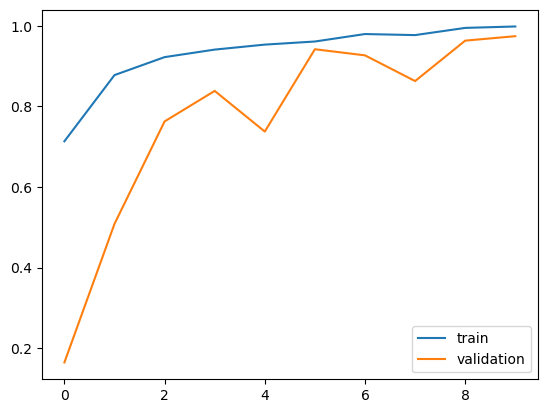

In [152]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


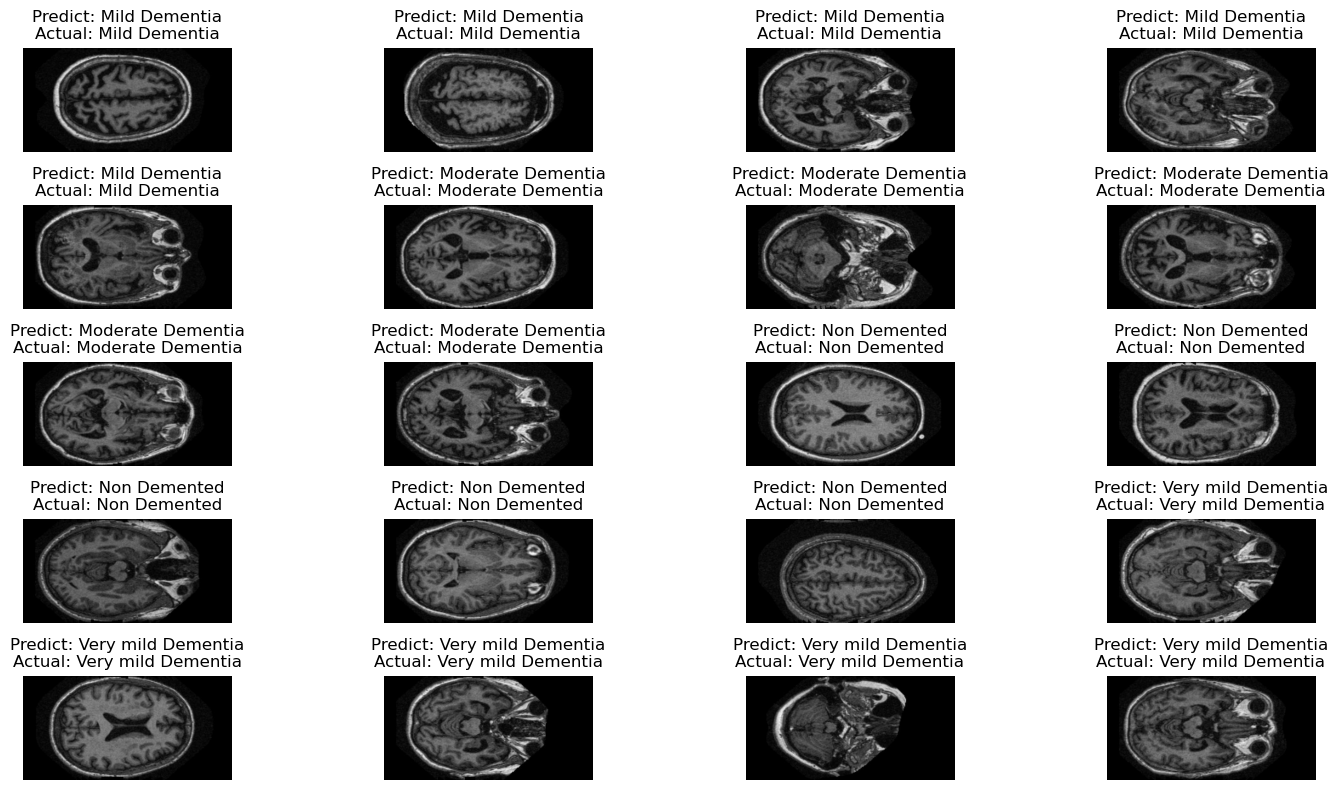

In [154]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input

# 이미지 로드 및 전처리
IMAGE_DIR = './datasets/alzheimer/original/'
IMAGE_SIZE = 64
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

def load_random_images(image_dir, class_names, num_images=16):
    images_per_class = num_images // len(class_names)
    remainder = num_images % len(class_names)

    images = []
    labels = []

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
        selected_images = random.sample(all_images, min(images_per_class, len(all_images)))

        images.extend(selected_images)
        labels.extend([class_name] * len(selected_images))

    # 추가로 필요한 이미지를 무작위로 선택
    if remainder > 0:
        additional_images = []
        additional_labels = []
        for class_name in class_names:
            class_dir = os.path.join(image_dir, class_name)
            all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
            additional_images.extend(random.sample(all_images, min(remainder, len(all_images))))
            additional_labels.extend([class_name] * min(remainder, len(all_images)))
            remainder -= len(additional_images)
            if remainder <= 0:
                break
        images.extend(additional_images)
        labels.extend(additional_labels)

    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 20개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=20)

# Predict and visualize the results
plt.figure(figsize=(15, 8))  
for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=8)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    # Visualize the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(5, 4, idx + 1)  # Visualize the images in a 4x4 grid
    plt.imshow(image)
    actual_class_name = random_labels[idx]
    title_text = f"Predict: {predicted_class_name}\nActual: {actual_class_name}"
    if predicted_class_name != actual_class_name:
        title_text += "\nIncorrect"
        plt.title(title_text, color='red')  # 틀린 예측은 빨간색으로 표시
    else:
        plt.title(title_text)
    plt.axis('off')
plt.tight_layout()
plt.show()

#### inception

In [33]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = resampled_data['file_paths'].values
train_targets = resampled_data['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 31, 31, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 31, 31, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 31, 31, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 29, 29, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 29, 29, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 29, 29, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 29, 29, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 29, 29, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 29, 29, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 15, 15, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 15, 15, 128)       │               

 Total params: 20,964,134 (79.97 MB)

 Trainable params: 20,909,606 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [36]:
import gc

gc.collect()

155103

In [38]:
from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치를 계산합니다.
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_targets), y=train_targets)
class_weights = dict(enumerate(class_weights))

N_EPOCHS = 10

# 모델 학습 시 클래스 가중치를 적용합니다.
history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    class_weight=class_weights,  # 클래스 가중치를 추가합니다.
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - acc: 0.5328 - loss: 1.0814 - val_acc: 0.8013 - val_loss: 0.8828 - learning_rate: 0.0010
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - acc: 0.8854 - loss: 0.3195 - val_acc: 0.7858 - val_loss: 1.6996 - learning_rate: 0.0010
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - acc: 0.9304 - loss: 0.2056 - val_acc: 0.7589 - val_loss: 1.0665 - learning_rate: 0.0010
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - acc: 0.9768 - loss: 0.0717 - val_acc: 0.9466 - val_loss: 0.1409 - learning_rate: 1.0000e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - acc: 0.9921 - loss: 0.0272 - val_acc: 0.9523 - val_loss: 0.1425 - learning_rate: 1.0000e-04
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - acc: 0.9964 - loss: 0.0175 - val_acc: 0.9803 - val_loss: 0.0563 - learning_rate: 1.0000e-04
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - acc: 0.9989 - loss: 0.0084 - val_acc: 0.9602 - val_loss: 0.1319 - learning_rate: 1.000

In [39]:
model.evaluate(test_dataset)

271/271 ━━━━━━━━━━━━━━━━━━━━ 83s 306ms/step - acc: 0.9793 - loss: 0.0724


[0.07617083191871643, 0.9779615998268127]

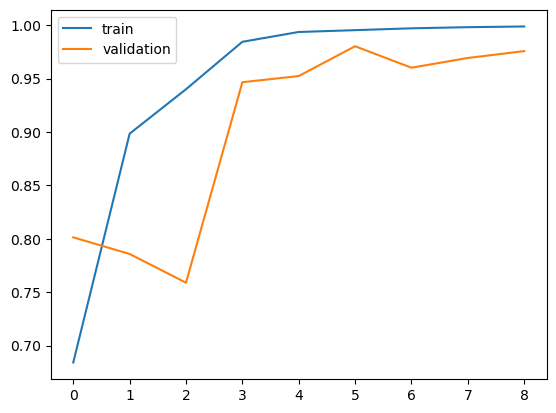

In [40]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


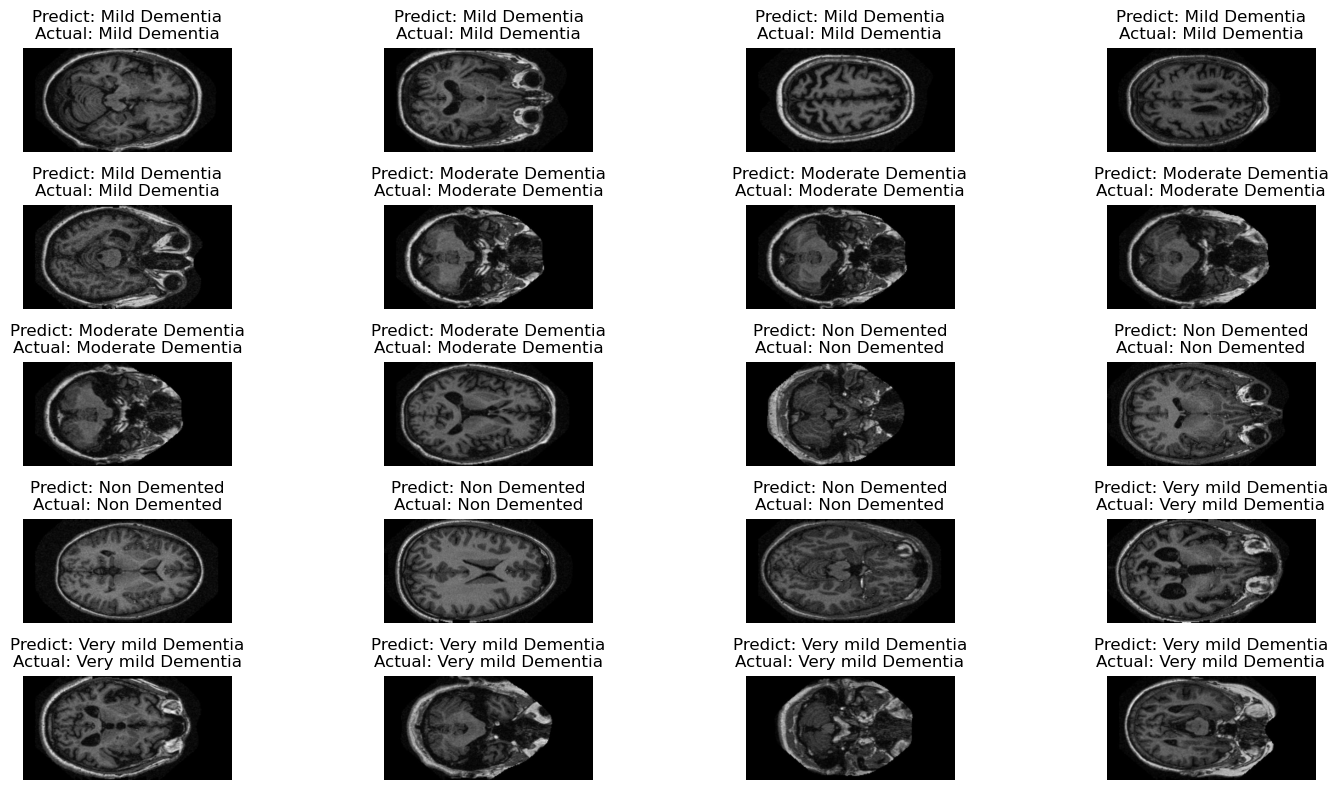

In [41]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input

# 이미지 로드 및 전처리
IMAGE_DIR = './datasets/alzheimer/original/'
IMAGE_SIZE = 64
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

def load_random_images(image_dir, class_names, num_images=16):
    images_per_class = num_images // len(class_names)
    remainder = num_images % len(class_names)

    images = []
    labels = []

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
        selected_images = random.sample(all_images, min(images_per_class, len(all_images)))

        images.extend(selected_images)
        labels.extend([class_name] * len(selected_images))

    # 추가로 필요한 이미지를 무작위로 선택
    if remainder > 0:
        additional_images = []
        additional_labels = []
        for class_name in class_names:
            class_dir = os.path.join(image_dir, class_name)
            all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
            additional_images.extend(random.sample(all_images, min(remainder, len(all_images))))
            additional_labels.extend([class_name] * min(remainder, len(all_images)))
            remainder -= len(additional_images)
            if remainder <= 0:
                break
        images.extend(additional_images)
        labels.extend(additional_labels)

    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 20개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=20)

# Predict and visualize the results
plt.figure(figsize=(15, 8))  
for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=8)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    # Visualize the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(5, 4, idx + 1)  # Visualize the images in a 4x4 grid
    plt.imshow(image)
    actual_class_name = random_labels[idx]
    title_text = f"Predict: {predicted_class_name}\nActual: {actual_class_name}"
    if predicted_class_name != actual_class_name:
        title_text += "\nIncorrect"
        plt.title(title_text, color='red')  # 틀린 예측은 빨간색으로 표시
    else:
        plt.title(title_text)
    plt.axis('off')
plt.tight_layout()
plt.show()

#### mobilenet

In [20]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = resampled_data['file_paths'].values
train_targets = resampled_data['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 31, 31, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 31, 31, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 31, 31, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 29, 29, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 29, 29, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 29, 29, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 29, 29, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 29, 29, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 29, 29, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 15, 15, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 15, 15, 128)       │               

 Total params: 20,964,134 (79.97 MB)

 Trainable params: 20,909,606 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [23]:
import gc

gc.collect()

1218

In [24]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치를 계산합니다.
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_targets), y=train_targets)
class_weights = dict(enumerate(class_weights))

N_EPOCHS = 10

# 모델 학습 시 클래스 가중치를 적용합니다.
history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    class_weight=class_weights,  # 클래스 가중치를 추가합니다.
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - acc: 0.3253 - loss: 1.3189 - val_acc: 0.0679 - val_loss: 15.1232 - learning_rate: 0.0010
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 157s 807ms/step - acc: 0.8117 - loss: 0.4559 - val_acc: 0.7700 - val_loss: 0.9148 - learning_rate: 0.0010
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 132s 689ms/step - acc: 0.9093 - loss: 0.2538 - val_acc: 0.6542 - val_loss: 2.4151 - learning_rate: 0.0010
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 127s 662ms/step - acc: 0.9465 - loss: 0.1603 - val_acc: 0.8409 - val_loss: 0.6291 - learning_rate: 0.0010
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 129s 674ms/step - acc: 0.9718 - loss: 0.0822 - val_acc: 0.7672 - val_loss: 0.7942 - learning_rate: 0.0010
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 134s 699ms/step - acc: 0.9784 - loss: 0.0832 - val_acc: 0.8923 - val_loss: 0.5192 - learning_rate: 0.0010
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 130s 679ms/step - acc: 0.9794 - loss: 0.0710 - val_acc: 0.7940 - val_loss: 1.0558 - learning_rate

In [26]:
model.evaluate(test_dataset)

  1/271 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - acc: 0.7031 - loss: 1.7286

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


271/271 ━━━━━━━━━━━━━━━━━━━━ 116s 430ms/step - acc: 0.8177 - loss: 0.9563


[0.9551653265953064, 0.8156524896621704]

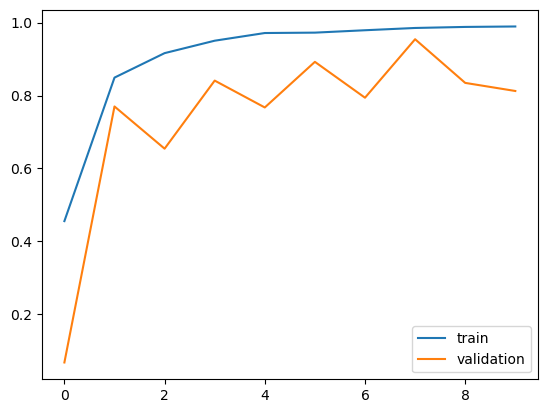

In [25]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


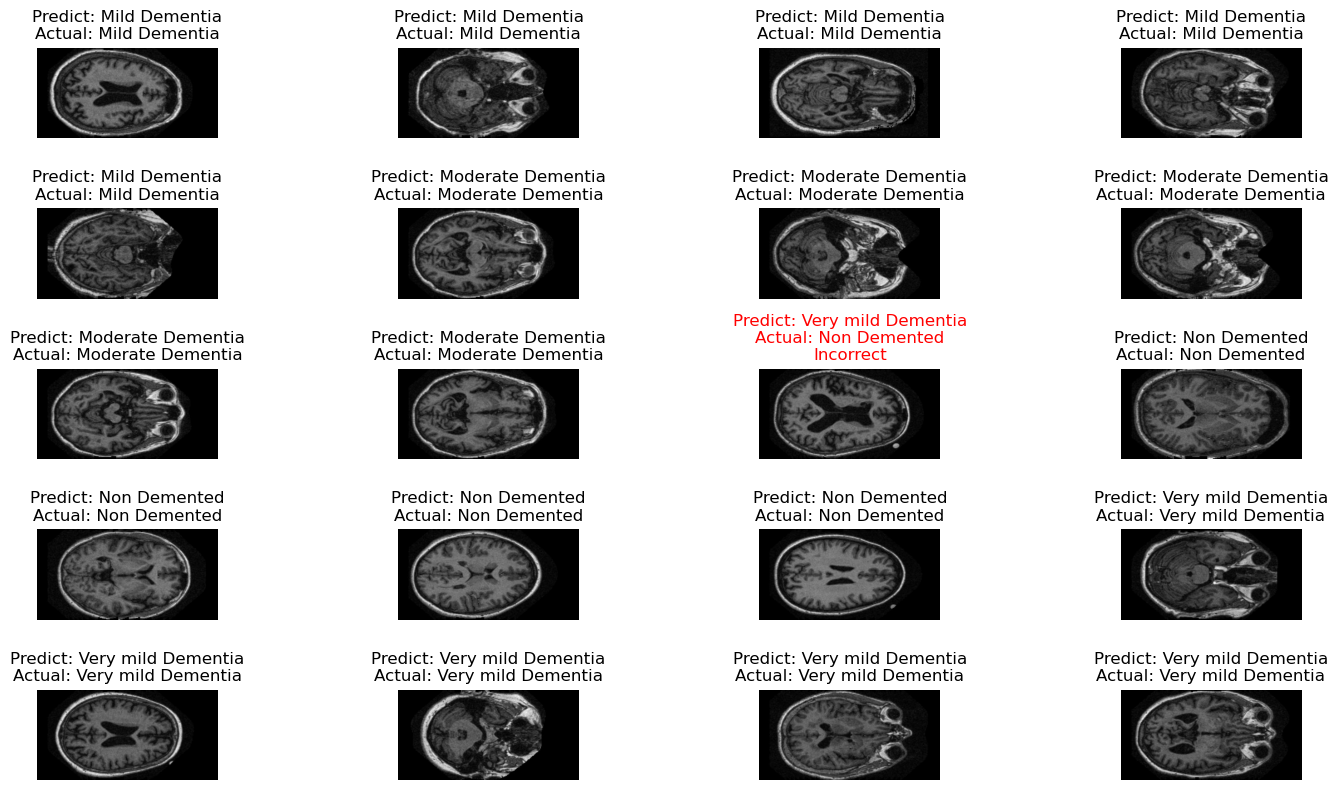

In [32]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet import preprocess_input

# 이미지 로드 및 전처리
IMAGE_DIR = './datasets/alzheimer/original/'
IMAGE_SIZE = 64
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

def load_random_images(image_dir, class_names, num_images=16):
    images_per_class = num_images // len(class_names)
    remainder = num_images % len(class_names)

    images = []
    labels = []

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
        selected_images = random.sample(all_images, min(images_per_class, len(all_images)))

        images.extend(selected_images)
        labels.extend([class_name] * len(selected_images))

    # 추가로 필요한 이미지를 무작위로 선택
    if remainder > 0:
        additional_images = []
        additional_labels = []
        for class_name in class_names:
            class_dir = os.path.join(image_dir, class_name)
            all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
            additional_images.extend(random.sample(all_images, min(remainder, len(all_images))))
            additional_labels.extend([class_name] * min(remainder, len(all_images)))
            remainder -= len(additional_images)
            if remainder <= 0:
                break
        images.extend(additional_images)
        labels.extend(additional_labels)

    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 20개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=20)

# Predict and visualize the results
plt.figure(figsize=(15, 8))  
for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=8)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    # Visualize the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(5, 4, idx + 1)  # Visualize the images in a 4x4 grid
    plt.imshow(image)
    actual_class_name = random_labels[idx]
    title_text = f"Predict: {predicted_class_name}\nActual: {actual_class_name}"
    if predicted_class_name != actual_class_name:
        title_text += "\nIncorrect"
        plt.title(title_text, color='red')  # 틀린 예측은 빨간색으로 표시
    else:
        plt.title(title_text)
    plt.axis('off')
plt.tight_layout()
plt.show()

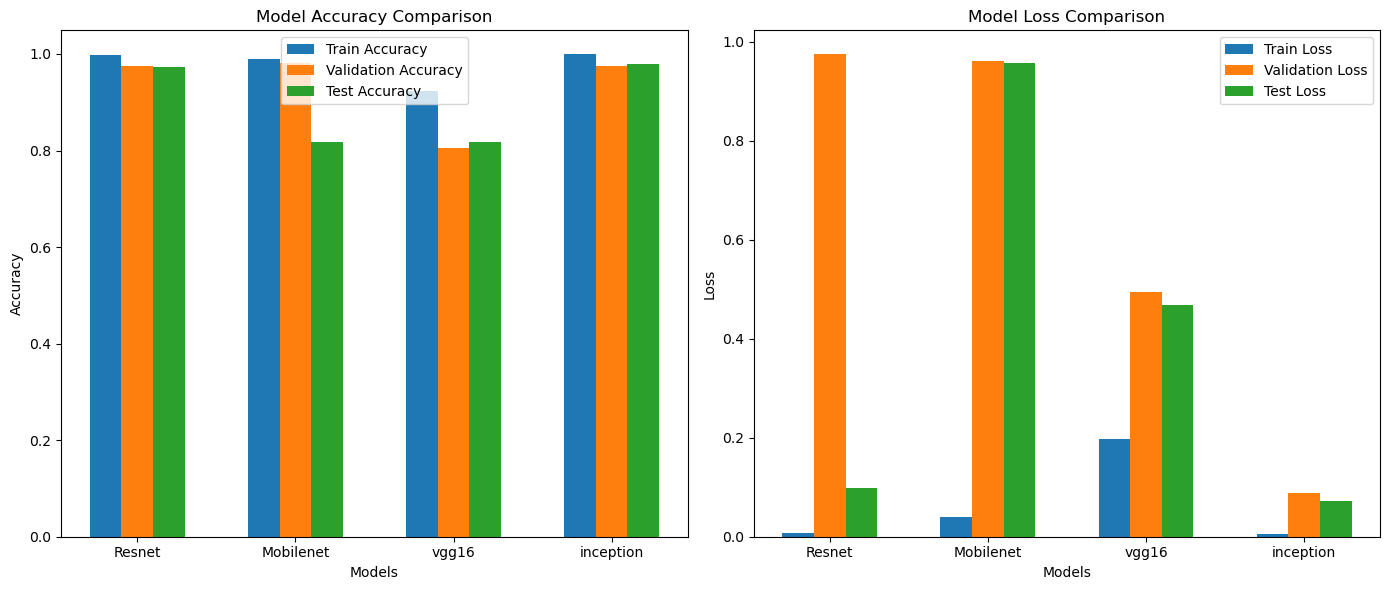

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 이름
models = ['Resnet', 'Mobilenet', 'vgg16', 'inception']

# 각 모델의 정확도 및 손실
accuracy = {
    'train': [0.9979 , 0.9903 , 0.9242 , 0.9990],
    'validation': [0.9742 , 0.9812, 0.8061 , 0.9757 ],
    'test': [0.9736, 0.8177, 0.8168, 0.9793]
}

loss = {
    'train': [0.0080 , 0.0394 , 0.1970 , 0.0057 ],
    'validation': [0.9742, 0.9614 , 0.4953 , 0.0882],
    'test': [0.0990, 0.9563, 0.4690, 0.0724]
}

# x축의 위치
x = np.arange(len(models))

# 막대 너비
bar_width = 0.2

# 정확도 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 정확도 그래프
ax[0].bar(x - bar_width, accuracy['train'], width=bar_width, label='Train Accuracy')
ax[0].bar(x, accuracy['validation'], width=bar_width, label='Validation Accuracy')
ax[0].bar(x + bar_width, accuracy['test'], width=bar_width, label='Test Accuracy')

# 설정
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()

# 손실 시각화
# 손실 그래프
ax[1].bar(x - bar_width, loss['train'], width=bar_width, label='Train Loss')
ax[1].bar(x, loss['validation'], width=bar_width, label='Validation Loss')
ax[1].bar(x + bar_width, loss['test'], width=bar_width, label='Test Loss')

# 설정
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model Loss Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()

### 📍데이터의 비중을 맞춘 뒤 4개의 사전 훈련 모델로 훈련한 결과
- 손실값은 전체적으로 줄어들고, 정확도는 상승하는 추세였으며 4가지 모델 모두 정확도는 0.9정도, 손실값은 1.0 이하로 준수한 성능을 보였다.
- 각 모델별로 실제 예측을 진행해보았을 때, Resnet(20/20) / Mobilenet(19/20) / Vgg16(17/20) / Inception(20/20) 으로 vgg16모델을 제외한 나머지는 0.95이상의 정확도를 보였다.
- 그 중에서도 정확도는 가장 높으며 손실값이 가장 낮은 inception모델이 해당 데이터에 가장 적합한 모델임을 알 수 있었다.
  > 해당 데이터는 고용량 데이터로, 다른 모델들에 비해 깊고 복잡한 학습을 필요로 하기 때문에,  
  > vgg16이나 mobilenet과 같이 단순하거나 경량화된 모델이 아닌, Resnet과 Inception 모델에서 좋은 학습이 진행되었다고 판단하였다.